# Linear Regression with One Variable

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')
%matplotlib inline

In [2]:
try:
    os.chdir(os.path.join(os.path.dirname(os.getcwd()), r'mlclass-ex1-006\mlclass-ex1'))
    print(os.getcwd())
except:
    pass

P:\2019 Study\Python\coursera-mlclass-ex-python\mlclass-ex1-006\mlclass-ex1


In [3]:
data1 = pd.read_csv('ex1data1.txt', names=['X', 'y'])
data1.describe()

,X,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


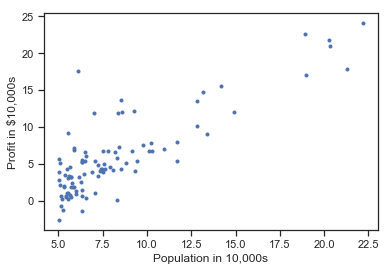

In [4]:
plt.plot(data1.X, data1.y, '.')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
None

In [5]:
m = len(data1)
X = np.c_[np.ones(m), 
          data1.X.to_numpy()]
y = data1.y.to_numpy().reshape((m, 1))
# X2 = np.column_stack((np.ones(m),
#                     data1.X.to_numpy()))
# X == X2

## Close-form solution

close-form solution of linear regression: $\hat{\theta}=(X^T X)^{-1}X^Ty$

In [6]:
theta_hat = np.linalg.inv((X.T)@X)@(X.T)@y  # @: matrix multiplication .dot after Python 3.5
y_hat = X@theta_hat

In [7]:
theta_hat

array([[-3.89578088],
       [ 1.19303364]])

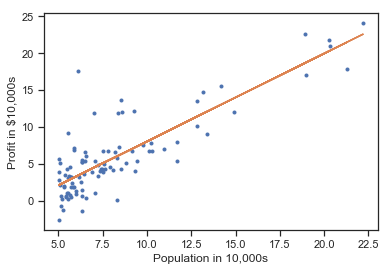

In [8]:
plt.plot(data1.X, data1.y, '.')
plt.plot(data1.X, y_hat, '-')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
None

## Cost function

cost function for linear regression, correspondent to MSE (mean square error) and $l^2$ norm:

$J(\theta) = \frac{1}{2m} \sum^{m}_{i=1}(\theta^Tx^{(i)} - y^{(i)})^2 = \frac{1}{2}MSE = \frac{1}{2m} (\Vert \hat{y}-y\Vert_2)^2$, 

where $\Vert \cdot \Vert_2$ is the Euclidean norm on $\mathbb{R}^m$.

In [9]:
def cost_function_l2(X, y, theta):
    return (np.linalg.norm(X@theta - y))**2 / (2*len(y))

In [10]:
def cost_function_l2_2(X, y, theta):
    return np.sum((X@theta - y)**2) / (2*len(y))

In [11]:
cost_function_l2(X, y, np.zeros((2,1)))

32.072733877455676

In [12]:
# cost_function_l2_2(X, y, np.zeros((2,1)))

In [13]:
cost_function_l2(X, y, theta_hat)

4.476971375975178

## Vanilla (Batch) Gradient Descent

In [14]:
def gradient_descent(X, y, eta, iters):
    m = len(y)
    theta = np.random.randn(2, 1)
    for _ in range(iters):
        gradient = 1/m * X.T@(X@theta - y)
        theta = theta - eta * gradient
    return theta

In [15]:
gradient_descent(X, y, 0.01, 10000)

array([[-3.89578081],
       [ 1.19303364]])

In [16]:
gradient_descent(X, y, 0.025, 10000)

array([[-2.06418341e+234],
       [-2.05471432e+235]])

In [17]:
gradient_descent(X, y, 0.001, 10000)

array([[-3.11210491],
       [ 1.11430489]])

### Gradient descent learning rate
See [Hands-on book In[17]](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)

In [18]:
def plot_gradient_descent(X, y, theta, eta, iters=1000):
    m = len(y)
    plt.plot(X[:,1:], y, 'k.')
    theta_lines = []
    for i in range(iters):
        if i < 10:
            y_hat = X.dot(theta)
            if i == 0:
                style = 'c'
            else:
                style = 'b'
            plt.plot(X[:,1:], y_hat, style)
        gradient = 1/m * X.T@(X@theta - y)
        theta = theta - eta * gradient
        theta_lines.append(theta)
    plt.axis([4, 23, -15, 26])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

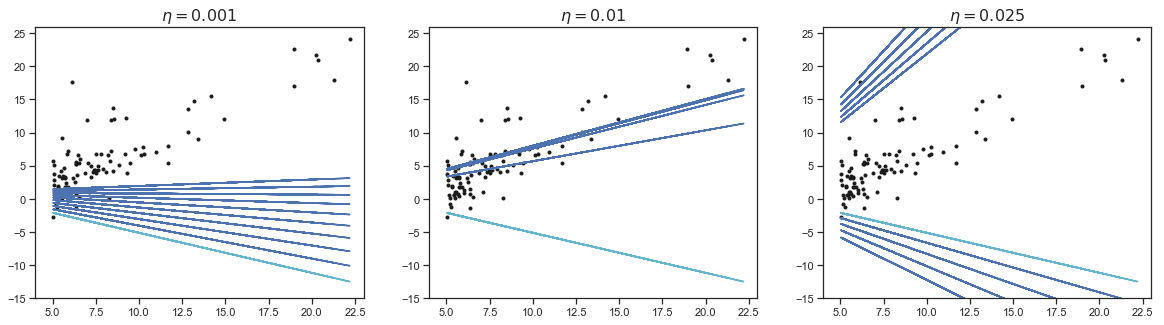

In [19]:
np.random.seed(69)
theta_init = np.random.randn(2,1)

plt.figure(figsize=(20,5))
plt.subplot(131); plot_gradient_descent(X, y, theta_init, eta=0.001)
plt.subplot(132); plot_gradient_descent(X, y, theta_init, eta=0.01)
plt.subplot(133); plot_gradient_descent(X, y, theta_init, eta=0.025)

## Scikit-learn Fit

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data1.X.to_numpy().reshape((m, 1))  
lin_reg = LinearRegression().fit(X, y)  # Without "feature": theta_0 and x^(i) = 1

In [21]:
lin_reg.intercept_, lin_reg.coef_

(array([-3.89578088]), array([[1.19303364]]))

The cofficient $R^2$

In [22]:
lin_reg.score(X, y)

0.7020315537841397

In [23]:
mean_squared_error(y, lin_reg.predict(X)) / 2

4.476971375975179

### Learning curve

For simplicity, no training/validation/test sets splitted. Just a curve of cost function vs. size.

In [24]:
def plot_learning_curve(X, y, model):
    m = len(y)
    cost = []
    for i in range(1, m):
        model.fit(X[:i], y[:i])
        y_hat = model.predict(X[:i])
        cost.append(mean_squared_error(y_hat, y[:i]) / 2)
        
    fig, ax = plt.subplots()
    ax.plot(cost, linewidth=2)
    ax.text(m - 8, 4.7, '%.4f' % round(cost[-1], 4))
    ax.set_xlabel('Size')
    ax.set_ylabel('Cost')
    return None

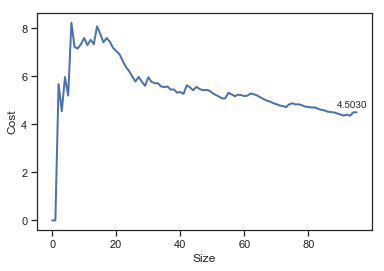

In [25]:
plot_learning_curve(X, y, LinearRegression())

It's learning curve of training set. When there are one or two instance, the model can fit it perfectly. This is why the curve starts at 0.